<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/pytorch/week_03/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [13]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [14]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


2.5.1+cu124


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [15]:
# object detection
# image segmentation
# image classification

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [16]:
# when model is too complex and it basically learns everything in the training data
# so it has low loss for train data , but when encountered with test data it has high loss

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [17]:
# make the model less complex
# dropouts
# early stopping
# regularization

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [18]:
# nope

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [19]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(
    root="data",
    download='True',
    transform=ToTensor(),
    train='True'
)

test_data = datasets.MNIST(
    root="data",
    download='True',
    transform=ToTensor(),
    train="False"
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [20]:
classes_list = train_data.classes
classes_list

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [21]:
import matplotlib.pyplot as plt


(-0.5, 27.5, 27.5, -0.5)

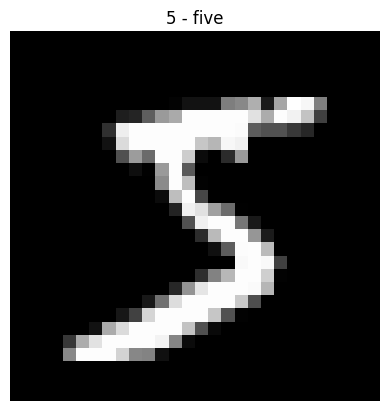

In [22]:
image,label = train_data[0]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(classes_list[label])
plt.axis(False)

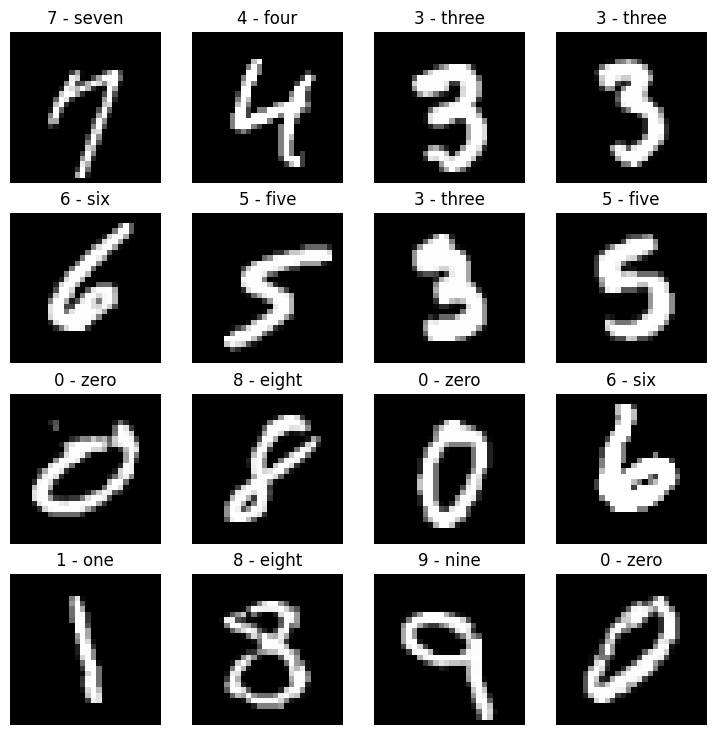

In [23]:
import matplotlib.pyplot as plt

rows = 4
cols = 4
fig = plt.figure(figsize=(9,9))

for i in range(1,rows*cols+1):

  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  image,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(), cmap='gray')

  plt.title(classes_list[label])
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [24]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(train_data,shuffle=True,batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [25]:
from torch import nn

In [26]:
class ClassifierV1(nn.Module):
  def __init__(self,input_shape:int, hidden_features:int, output_shape:int):
    super().__init__()
    self.Conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=1,  # as black n white image
                  out_channels=hidden_features,
                  kernel_size = 3,
                  stride=1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_features,hidden_features,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.Conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_features,  # as black n white image
                  out_channels=hidden_features,
                  kernel_size = 3,
                  stride=1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_features,hidden_features,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.forward_pass = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_features * 7 * 7, # as after passing through the 2 conv blocks our image shape becomes [10,7,7]
                 out_features=output_shape)
    )

  def forward(self,x):
    x = self.Conv_layer_1(x)
    x = self.Conv_layer_2(x)
    x = self.forward_pass(x)

    return x

In [27]:
mymodel1 = ClassifierV1(input_shape=1,
                        hidden_features=10,
                        output_shape=len(classes_list))

In [28]:
image,label = train_data[0]

In [29]:
image.shape

torch.Size([1, 28, 28])

In [30]:
image = image.unsqueeze(dim=1)

In [31]:
image.shape

torch.Size([1, 1, 28, 28])

In [32]:
y_logits = mymodel1(image)
y_logits.shape
y_logits

tensor([[ 0.0653,  0.0368,  0.0356, -0.0384, -0.0436, -0.0134, -0.0384, -0.0323,
         -0.0283, -0.0257]], grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [33]:
loss_fnc = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = mymodel1.parameters(),
                            lr = 0.01)

In [34]:
def train_loop(model:torch.nn.Module, dataloader = torch.utils.data.DataLoader, loss_fnc = torch.nn.Module, optimizer = torch.optim.Optimizer):
  train_loss = 0

  for batch,(X,y) in enumerate(dataloader):

    model.train()
    y_logits = model(X)
    # y_pred = y_logits.softmax()
    # y_pred = y_pred.argmax(dim=1)

    loss = loss_fnc(y_logits,y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  average_loss = train_loss/len(dataloader)

  print(f"train loss : {average_loss}")

In [35]:
def test_loop(model:torch.nn.Module, dataloader = torch.utils.data.DataLoader, loss_fnc = torch.nn.Module):
  test_loss = 0
  model.eval()
  with torch.inference_mode():
    for (X,y) in dataloader:
      y_logits = model(X)
      # y_pred = y_logits.softmax()
      # y_pred = y_pred.argmax(dim=1)

      loss = loss_fnc(y_logits,y)
      test_loss += loss.item()

  average_loss = test_loss/len(dataloader)

  print(f"test loss : {average_loss}")


In [36]:
from tqdm.auto import tqdm

In [37]:
epochs = 5

for i in tqdm(range(epochs)):
  print(f"epoch : {i} ---------------")
  train_loop(model=mymodel1,
             dataloader=train_dataloader,
             loss_fnc=loss_fnc,
             optimizer = optimizer
             )

  test_loop(model=mymodel1,
            dataloader=test_dataloader,
            loss_fnc=loss_fnc,
            )

  0%|          | 0/5 [00:00<?, ?it/s]

epoch : 0 ---------------
train loss : 1.0271372999052206
test loss : 0.18019386715491612
epoch : 1 ---------------
train loss : 0.14377510976095995
test loss : 0.10317200063243509
epoch : 2 ---------------
train loss : 0.10238443232029676
test loss : 0.08543689413042739
epoch : 3 ---------------
train loss : 0.08604547420802215
test loss : 0.07248096194987495
epoch : 4 ---------------
train loss : 0.07554643438309432
test loss : 0.06625446667047218


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [38]:
def make_predictions(model:torch.nn.Module, data:list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for X in data:
      X=X.unsqueeze(dim=0)
      y_logits = model(X)
      y_pred = torch.softmax(y_logits.squeeze(),dim=0)

      pred_probs.append(y_pred)
  return torch.stack(pred_probs)




In [39]:
size = 16
X_list = []
y_list = []
for i in range(size):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  X,y = train_data[random_idx]
  X_list.append(X)
  y_list.append(y)


In [40]:
pred_probs = make_predictions(model=mymodel1,data=X_list)


In [41]:
y_list

[0, 7, 3, 0, 2, 9, 7, 0, 3, 8, 8, 7, 4, 2, 2, 6]

In [42]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 7, 3, 0, 2, 9, 7, 0, 3, 8, 8, 7, 4, 2, 2, 6])

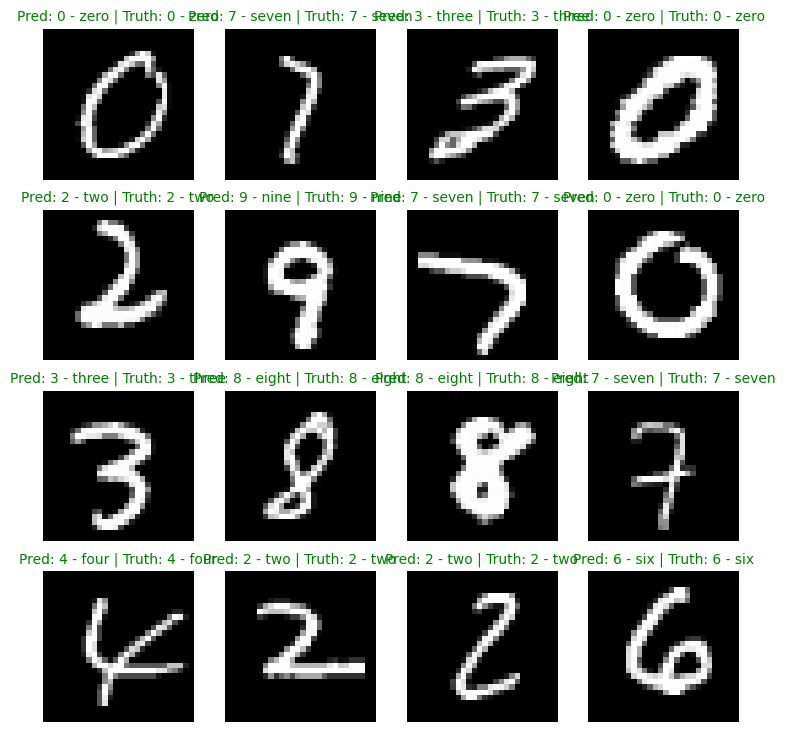

In [43]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 4
ncols = 4
for i, sample in enumerate(X_list):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = classes_list[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = classes_list[y_list[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [44]:
y_preds = []
mymodel1.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader):

    y_logits = mymodel1(X)

    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

    y_preds.append(y_pred)


y_pred_tensor = torch.cat(y_preds, dim=0)

  0%|          | 0/1875 [00:00<?, ?it/s]

In [45]:
!pip install torchmetrics

In [46]:
import mlxtend

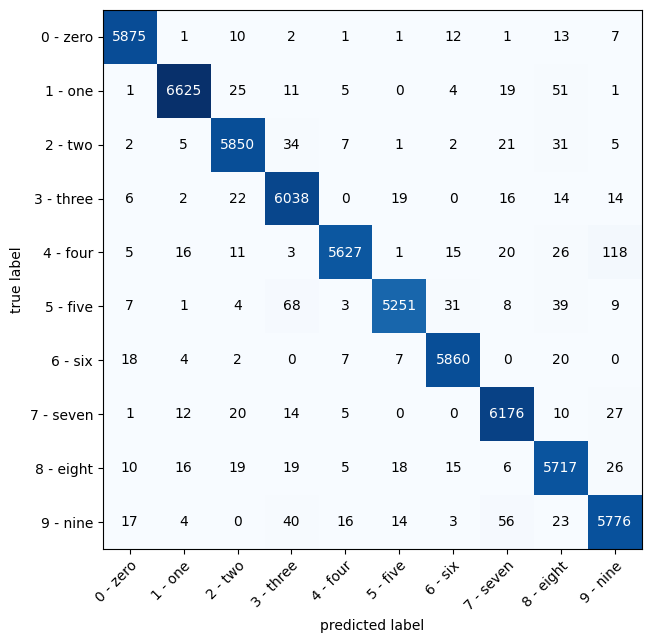

In [47]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(classes_list), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=classes_list, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [68]:
y_pred_tensor

tensor([5, 0, 4,  ..., 5, 6, 8])

In [69]:
y_pred_tensor.shape

torch.Size([60000])

In [70]:
test_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [49]:
test_data.targets.shape

torch.Size([60000])

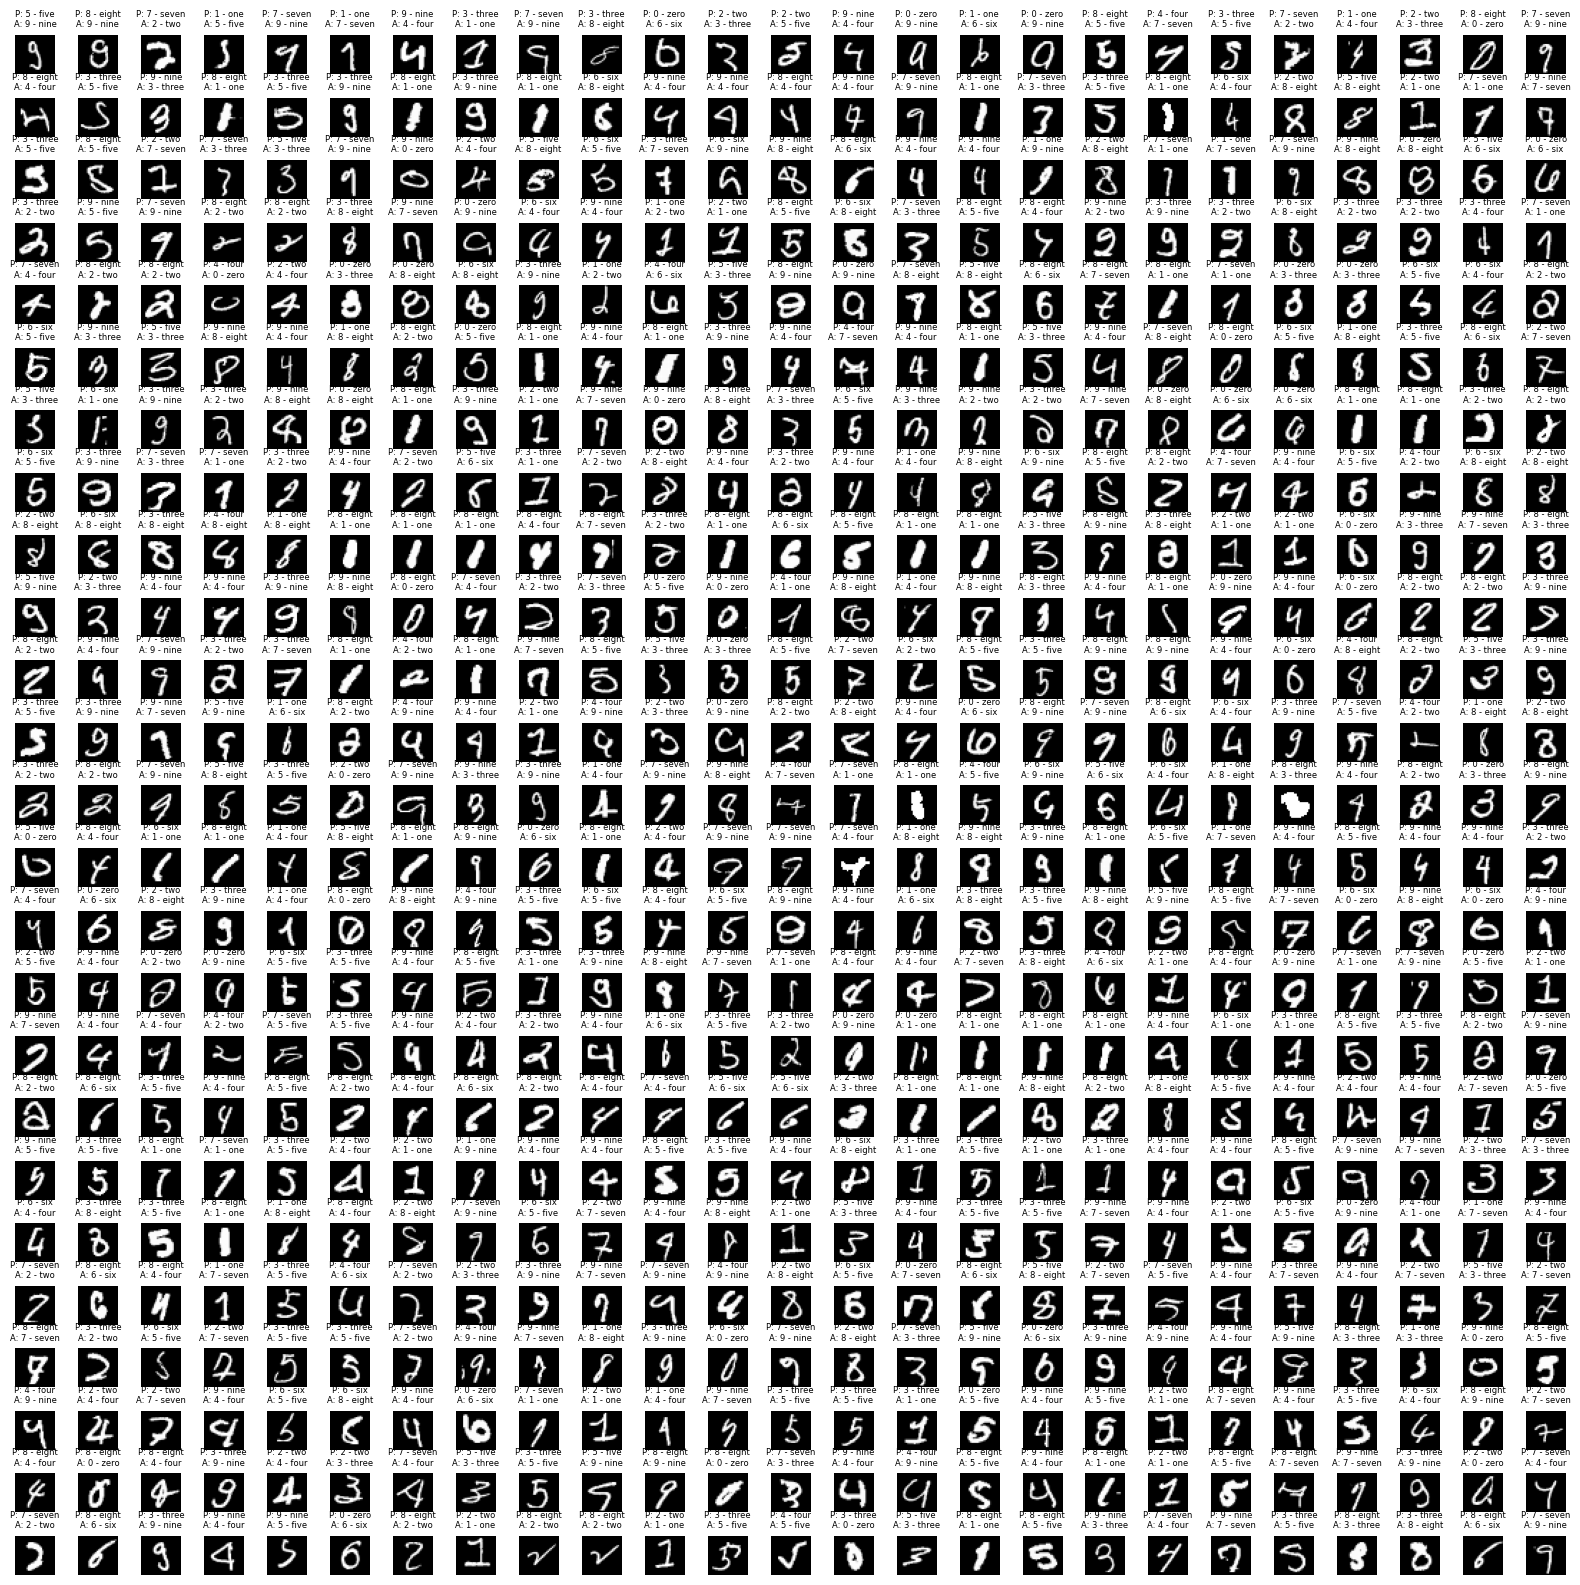

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 20))  # Adjusted figure size
rows, cols = 25, 25  # Grid size to fit up to 600 images

counter = 1
num_samples = len(test_data)  # Prevent IndexError

for i in range(num_samples):
    if y_pred_tensor[i] != test_data.targets[i]:  # Check misclassified images
        ax = fig.add_subplot(rows, cols, counter)
        ax.imshow(test_data.data[i], cmap="gray")  # Display image
        ax.set_title(f"P: {classes_list[y_pred_tensor[i].item()]}\nA: {classes_list[test_data.targets[i].item()]}", fontsize=6)
        ax.axis("off")  # Remove axis lines for better visualization
        counter += 1  # Increment properly

        if counter > rows * cols:  # Stop if we reach the max number of plots
            break

# ✅ Add spacing between images
plt.subplots_adjust(wspace=0.6, hspace=0.6)  # Adjust horizontal and vertical spacing

plt.show()


In [ ]:
# so it seems like data errors sometimes and sometimes the model is poor

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [64]:
random_tensor = torch.randn((1,3,64,64))
random_tensor

tensor([[[[ 0.3561,  0.4419, -1.1975,  ..., -0.2686, -0.8916,  0.1491],
          [ 0.5108,  0.6166, -1.6895,  ..., -0.7128,  0.9884, -0.3857],
          [-0.2026, -0.3164,  0.5497,  ..., -0.1648,  2.7869,  1.0778],
          ...,
          [ 0.4390,  2.0155, -0.6422,  ...,  0.9405,  1.0696, -0.7931],
          [ 0.5380, -0.1042,  1.2170,  ...,  1.1309, -0.0535,  0.0684],
          [-0.5162,  0.6880,  0.7209,  ...,  0.2717, -1.4786,  0.5616]],

         [[-1.7364, -0.2320,  0.5343,  ...,  1.5681, -1.6449, -1.5873],
          [ 1.8899,  1.6625, -1.7458,  ..., -0.2695, -0.2851,  0.9661],
          [-0.2398,  0.7166, -0.9491,  ...,  0.7979,  0.3609,  0.6635],
          ...,
          [-2.1559,  1.0278,  0.3287,  ..., -0.1407, -0.2337,  1.4510],
          [ 0.6945,  0.5405,  1.0078,  ...,  0.8149, -0.7111,  0.7498],
          [ 2.5336, -0.3709,  0.0859,  ..., -1.1655,  0.9476,  0.0950]],

         [[-0.4662,  1.0479, -0.7248,  ..., -1.5020,  1.8981,  0.9883],
          [-0.0533,  0.8147,  

In [67]:
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,kernel_size=10)

output = conv_layer(random_tensor)
output.shape

torch.Size([1, 10, 55, 55])

In [ ]:
# as kernel size increases the feature map becomes smaller and smaller